In [8]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 이미지 파일 경로 설정
folder_path = 'C:\\Users\\user\\Downloads\\image_ext'

image_data = []

# 각 폴더 및 하위 폴더 탐색
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # 이미지 파일인지 확인 (확장자 기반)
        if file.lower().endswith(('.png', '.jpg', '.jpeg')): 
            # 이미지 열기
            with Image.open(os.path.join(root, file)) as img:
                width, height = img.size  # 이미지의 가로, 세로 크기 (해상도) 가져오기
                # 파일 정보 저장 (폴더명, 파일명, 가로, 세로)
                image_data.append((os.path.basename(root), file, width, height))


df = pd.DataFrame(image_data, columns=['Folder', 'File Name', 'Width', 'Height'])

# 폴더별 이미지 해상도 통계 출력
folder_stats = df.groupby('Folder').agg({'Width': ['describe'], 'Height': ['describe']})
print(folder_stats)


          Width                                                             \
       describe                                                              
          count         mean          std     min      25%     50%     75%   
Folder                                                                       
0        1699.0  4108.581519  2501.554548  1849.0  2254.50  2452.0  7238.5   
1        1440.0  2935.477083  1801.259587  1701.0  2088.75  2217.5  2383.0   
2        1198.0  4575.075125  2625.974899  2054.0  2393.00  2566.0  7626.0   
3         706.0  5007.828612  2652.662939  2040.0  2427.25  2769.5  7696.5   

                 Height                                                 \
               describe                                                  
           max    count         mean         std    min     25%    50%   
Folder                                                                   
0       9106.0   1699.0   794.446145  454.994567  327.0  458.00  507.0   
1    

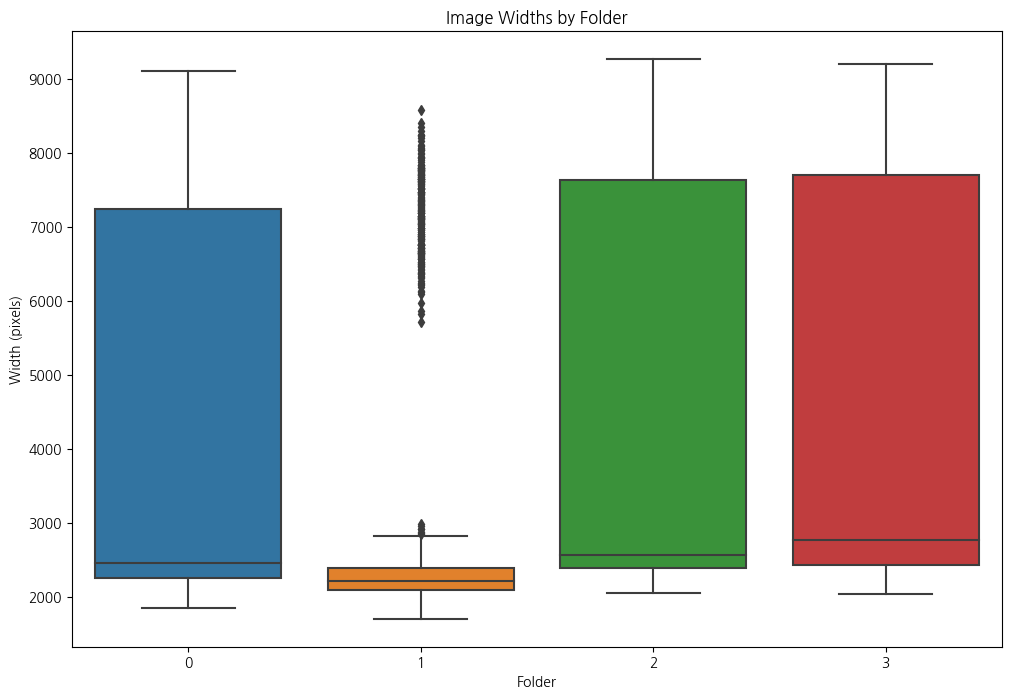

In [10]:
# 박스플롯 설정
plt.figure(figsize=(12, 8))  #
sns.boxplot(x='Folder', y='Width', data=df) 

plt.title('Image Widths by Folder') 
plt.xlabel('Folder')  
plt.ylabel('Width (pixels)') 

plt.show() 

In [11]:
# 가로 크기가 특정 픽셀 크기인 이미지만 필터링
filtered_df = df[df['Width'] > 8000]

filtered_df, filtered_df.shape

(     Folder    File Name  Width  Height
 17        0  0108-29.jpg   9043    1761
 18        0  0109-18.jpg   8197    1354
 19        0  0109-19.jpg   8180    1427
 31        0  0112-10.jpg   8302    1436
 32        0  0112-11.jpg   8341    1441
 ...     ...          ...    ...     ...
 4678      3  0704-07.jpg   8031    1772
 4679      3  0704-10.jpg   8146    1455
 4680      3  0704-11.jpg   8044    1436
 4681      3  0704-12.jpg   8040    1500
 4682      3  0704-13.jpg   8093    1374
 
 [340 rows x 4 columns],
 (340, 4))

In [12]:
# 이미지 파일 경로 설정
folder_path = 'C:\\Users\\user\\Downloads\\image_ext'

# 삭제할 파일 목록 초기화
files_to_delete = []

# 각 폴더 및 하위 폴더 탐색
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # 이미지 파일인지 확인 (확장자 기반)
        if file.lower().endswith(('.jpg',)):  # 필요한 이미지 파일 형식 추가 가능
            file_path = os.path.join(root, file)
            # 이미지 열기
            with Image.open(file_path) as img:
                width, height = img.size  # 이미지의 가로, 세로 크기 (해상도) 가져오기
                # 조건에 맞지 않는 파일 식별 (가로 크기가 1700 픽셀 이하)
                if width <= 1700:
                    files_to_delete.append(file_path)

# 식별된 파일 삭제
for file_path in files_to_delete:
    os.remove(file_path)
    print(f'Deleted: {file_path}')

print('Deletion process completed.')

Deletion process completed.


## 상하좌우 반전 이미지 수정

In [13]:
# 이미지 파일 경로 설정
folder_path = 'G:/다른 컴퓨터/내 컴퓨터/project/2023 빅데이터 분석 리더 과정/프로젝트/data/image'

# 이미지 수정 함수
def modify_image(file_path, action):
    # 이미지 열기
    with Image.open(file_path) as img:
        # 상하 반전
        if action == "flip_top_bottom":
            img = img.transpose(Image.FLIP_TOP_BOTTOM)
        # 좌우 반전
        elif action == "flip_left_right":
            img = img.transpose(Image.FLIP_LEFT_RIGHT)

        # 이미지 저장
        img.save(file_path)

# 각 폴더 및 하위 폴더 탐색
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # 이미지 파일인지 확인 (확장자 기반)
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            # 파일명에서 숫자 추출
            number = file.split('-')[0]
            
            file_path = os.path.join(root, file)

            # 특정 숫자에 해당하는 경우 이미지 수정
            if number in ["0119", "0123"]:
                modify_image(file_path, "flip_top_bottom")
            if number in ["1512", "1511", "1510", "1509", "1501", "0123", "0119"]:
                modify_image(file_path, "flip_left_right")

print('Image modification process completed.')

Image modification process completed.
